### Starting Off?

You are a data scientist for the MTA. For your first project, they want you to predict the number of subway riders for each day. You decide to do a linear regression model predict the riders but need to gather data first. With a partner brainstorm a list of different variables you think would explain the number of daily riders.  

# Multiple Linear Regression
Agenda Today:

- Create a model for multiple linear regression
- Interpret the output for multiple linear regression
- Multicollinearity



In [17]:
# build a simple linear regression in python
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")
from  sklearn.linear_model import LinearRegression

In [2]:
#read in car data
df = sns.load_dataset('mpg')
#read in movie data
movie_df = pd.read_csv('cleaned_movie_data.csv', index_col=0)

In [3]:
movie_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'rating', 'G', 'Other', 'PG', 'PG-13', 'R'],
      dtype='object')

In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [15]:
# building a linear regression model using statsmodel 
from statsmodels.formula.api import ols

lr_model = ols(formula='mpg~weight', data=df).fit()

Describe what you think the following things are doing.

`ols()`

`formula = 'mpg~weight`

`data=df`

`fit()`

In [16]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          2.97e-103
Time:                        11:07:41   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple Linear Regression
Multiple linear regression is simply a linear regression with more than one predictor, or independent variables. Let's recall the interpretation of $R^2$ in simple linear regression represents the proportion of variance explained by the model. What if we make the model more complex by including more predictors in it such that it account for even more variance in the outcome?


$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + + \beta_3 X_3\cdots + \beta_k X_k + \epsilon$

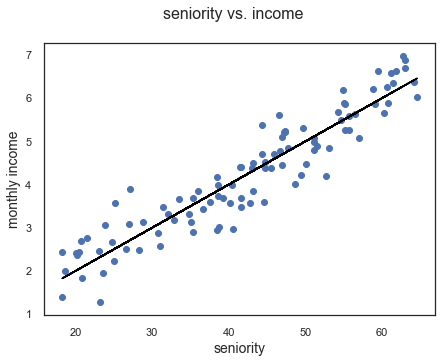

In [6]:
np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
income = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1,1)

fig = plt.figure(figsize=(7,5))
fig.suptitle('seniority vs. income', fontsize=16)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c = "black")
plt.xlabel("seniority", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show()

What if we include another factor, such as years of education? All that is doing is adding a higher dimensional object to the model, so our model will be three dimensional. 
<img src="multi_reg_graph.png" style="withd:300px;">

### There are 3 major uses for multiple linear regression analysis.  

1. Useful to identify the strength of the effect that the independent variables have on a dependent variable.

2. Forecast effects or impacts of changes.  That is, multiple linear regression analysis helps us to understand how much will the dependent variable change when we change the independent variables.  For instance, a multiple linear regression can tell you how much GPA is expected to increase (or decrease) for every one point increase (or decrease) in IQ.

3. Predicts trends and future values.  The multiple linear regression analysis can be used to get point estimates.  An example question may be “what will the price of gold be 6 month from now?”

In [61]:
df1=df[['mpg','weight','horsepower','displacement','cylinders','acceleration']].dropna(axis=0)
df1.isnull().sum()

mpg             0
weight          0
horsepower      0
displacement    0
cylinders       0
acceleration    0
dtype: int64

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# but I did not put city because values in city are strings
# I don't want to use data_cleaned['sqft_above'] because I already transformed 
# so if I used log_sqft_above it may cause high VIF 

# variables = data5[['yr_built','sqft_above']]
# variables = data_cleaned[['yr_built','log_sqft_above']]
variables =df1[['horsepower','displacement','cylinders','acceleration']]


# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.08849,displacement
1,3.08849,acceleration


In [7]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [77]:
mlr_model = ols(formula='mpg~horsepower+displacement+acceleration+cylinders', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     202.9
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           1.30e-93
Time:                        11:51:55   Log-Likelihood:                -1139.6
No. Observations:                 392   AIC:                             2289.
Df Residuals:                     387   BIC:                             2309.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       48.0213      2.787     17.232      0.000      42.542      53.500
horsepower      -0.0903      0.016     -5.705      0.000      -0.121      -0.059
displacement    -0.0252      0.009     -2.940      0.003      -0.042      -0.008
acceleration    -0.4106      0.116     -3.540      0.000      -0.639      -0.183
cylinders       -0.7062      0.428     -1.651      0.100      -1.548       0.135
==============================================================================
Omnibus:                       50.025   Durbin-Watson:                   0.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.505
Skew:                           0.838   Prob(JB):                     1.09e-16
Kurtosis:                       4.300   Cond. No.                     3.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpretation of the Model Parameters
- Each β parameter represents the change in the mean response, E(y), per unit increase in the associated predictor variable when all the other predictors are held constant.
- For example, β1 represents the estimated change in the mean response, E(y), per unit increase in x1 when x2, x3, ..., xp−1 are held constant.
- The intercept term, β0, represents the estimated mean response, E(y), when all the predictors x1, x2, ..., xp−1, are all zero (which may or may not have any practical meaning).

### Your Turn

Create a using the code example above create a multiple linear regression model to predict the gross revenue of movies.  


In [52]:
movie_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'rating', 'G', 'Other', 'PG', 'PG-13', 'R'],
      dtype='object')

In [53]:
my_data=movie_df[['gross','rating','budget','imdb_score']]

In [54]:
my_data.isnull().sum()

gross         0
rating        0
budget        0
imdb_score    0
dtype: int64

In [55]:
my_data.shape

(4157, 4)

In [40]:
my_data.describe(include='all')

,gross,rating,budget,imdb_score
count,4.157000e+03,4157,4.157000e+03,4157.000000
unique,NaN,5,NaN,NaN
top,NaN,R,NaN,NaN
freq,NaN,1856,NaN,NaN
mean,4.849151e+07,NaN,4.491703e+07,6.468631
std,6.846135e+07,NaN,2.151887e+08,1.050852
min,1.620000e+02,NaN,2.180000e+02,1.600000
25%,5.354039e+06,NaN,1.000000e+07,5.900000
50%,2.552850e+07,NaN,2.500000e+07,6.600000
75%,6.231888e+07,NaN,5.091162e+07,7.200000


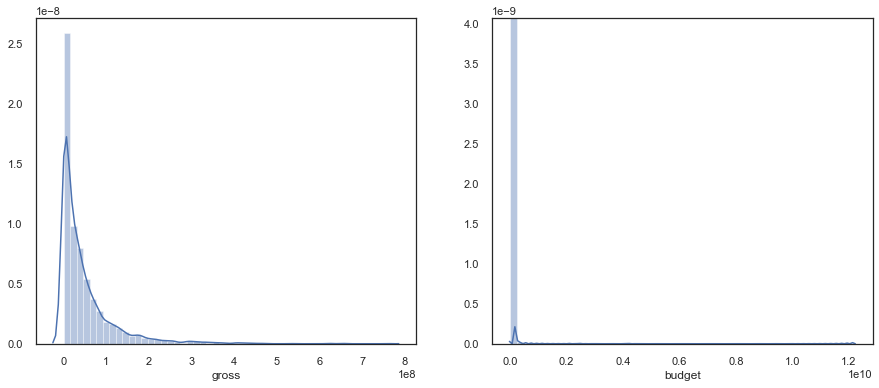

In [32]:
# distribution
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.distplot(my_data['gross'])
plt.subplot(122)
sns.distplot(my_data['budget'])

In [45]:
# # distribution
# plt.figure(figsize=(15,6))
# plt.subplot(121)
# sns.distplot(my_data['rating'])
# plt.subplot(122)
# sns.distplot(my_data['imdb_score'])
pd.DataFrame(my_data['rating'].value_counts()).reset_index()

,index,rating
0,R,1856
1,PG-13,1400
2,PG,611
3,Other,195
4,G,95


## What Is the Adjusted R-squared?

The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

Suppose you compare a five-predictor model with a higher R-squared to a one-predictor model. Does the five predictor model have a higher R-squared because it’s better? Or is the R-squared higher because it has more predictors? Simply compare the adjusted R-squared values to find out!

$$Adjusted R^2=1-\left(\frac{n-1}{n-p}\right)(1-R^2)$$

Where:

n = sample size   

p  = the number of independent variables in the regression equation


- The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. 

- The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. 

- It is always lower than the R-squared.

## Probabilistic Model Selection
Probabilistic model selection (or “information criteria”) provides an analytical technique for scoring and choosing among candidate models.

Models are scored both on their performance on the training dataset and based on the complexity of the model.

- **Model Performance:** How well a candidate model has performed on the training dataset.
- **Model Complexity:** How complicated the trained candidate model is after training.

Model performance may be evaluated using a probabilistic framework, such as log-likelihood under the framework of maximum likelihood estimation. Model complexity may be evaluated as the number of degrees of freedom or parameters in the model.

### Akaike Information Criterion vs. Bayesian Information Criterion

The model with the lower AIC or BIC should be selected. 

Despite various subtle theoretical differences, their only difference in practice is the size of the penalty; BIC penalizes model complexity more heavily.

Compared to the BIC method (below), the AIC statistic penalizes complex models less, meaning that it may put more emphasis on model performance on the training dataset, and, in turn, select more complex models.

A downside of BIC is that for smaller, less representative training datasets, it is more likely to choose models that are too simple.

https://machinelearningmastery.com/probabilistic-model-selection-measures/

https://www.methodology.psu.edu/resources/AIC-vs-BIC/

___

## Multicollinearity 

**Multicollinearity** occurs when independent variables in a regression model are very highly correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant.

There are two basic kinds of multicollinearity:

- **Structural multicollinearity:** This type occurs when we create a model term using other terms. In other words, it’s a byproduct of the model that we specify rather than being present in the data itself. For example, if you square term X to model curvature, clearly there is a correlation between X and X2.
- **Data multicollinearity:** This type of multicollinearity is present in the data itself rather than being an artifact of our model. Observational experiments are more likely to exhibit this kind of multicollinearity.

### What Problems Do Multicollinearity Cause?

Multicollinearity causes the following two basic types of problems:

- The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
- Multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.

### Do I Have to Fix Multicollinearity?

The need to reduce multicollinearity depends on its severity and your primary goal for your regression model. Keep the following three points in mind:

- The severity of the problems increases with the degree of the multicollinearity. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.
- Multicollinearity affects only the specific independent variables that are correlated. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. 
- Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

***That being said, the easies way to deal with multicollinearity is just to remove one of the variables***

In [10]:

# Compute the correlation matrix
corr = df.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


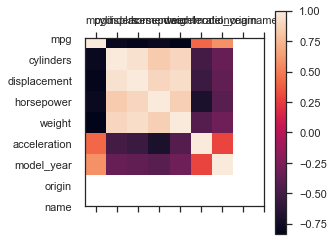

In [11]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

## Create a Better Looking Heatmap with Seaborn

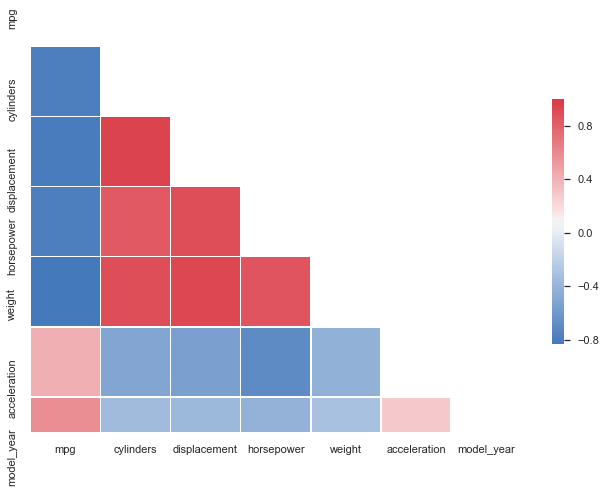

In [12]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

Even more examples to make your correlation heatmap look good
https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

### Rerun the Model After Removing the highly correlate variables

In [13]:
mlr_model = ols(formula='mpg~weight+horsepower+cylinders+acceleration', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     234.2
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          6.02e-102
Time:                        11:00:35   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     387   BIC:                             2270.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.2740      2.448     18.902      0.000      41.461      51.087
weight          -0.0052      0.001     -7.070      0.000      -0.007      -0.004
horsepower      -0.0453      0.016     -2.820      0.005      -0.077      -0.014
cylinders       -0.4005      0.303     -1.321      0.187      -0.997       0.196
acceleration    -0.0290      0.125     -0.232      0.817      -0.275       0.217
==============================================================================
Omnibus:                       38.540   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.705
Skew:                           0.706   Prob(JB):                     3.59e-12
Kurtosis:                       4.111   Cond. No.                     3.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Working with Movie Data

Identify any variables with a high correlation, remove one of them, and rerun your model.

In [14]:
## yoru code here

## Resources

Everything about regression:  https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-tutorial-and-examples

Statsmodels example: https://datatofish.com/statsmodels-linear-regression/